In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import classification_report

In [2]:
pokemon = pd.read_csv("pokemon.csv") # Dataset pokemon stats
combats = pd.read_csv("combats.csv") # Dataset pokemon battles and who won

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon.nunique()

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

Text(0, 0.5, 'Frequency')

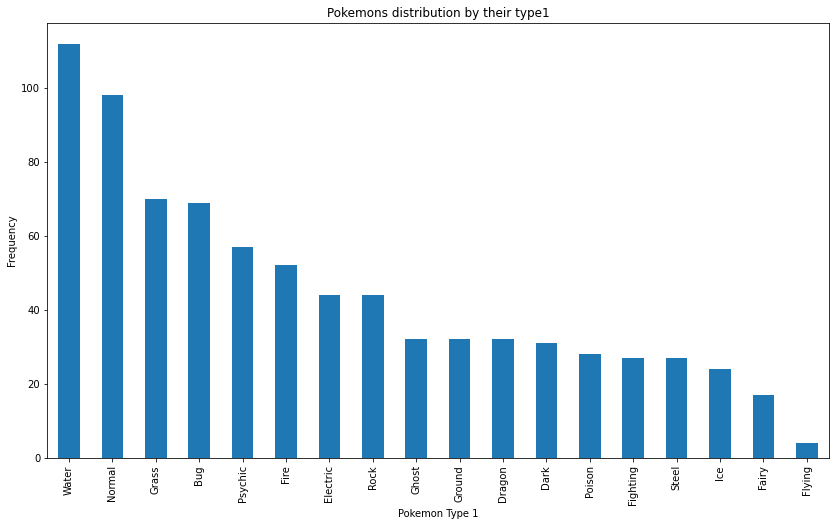

In [6]:
# Plot the number of pokemon present in each category of "type 1"
ax = pokemon['Type 1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Pokemons distribution by their type1")
ax.set_xlabel("Pokemon Type 1")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

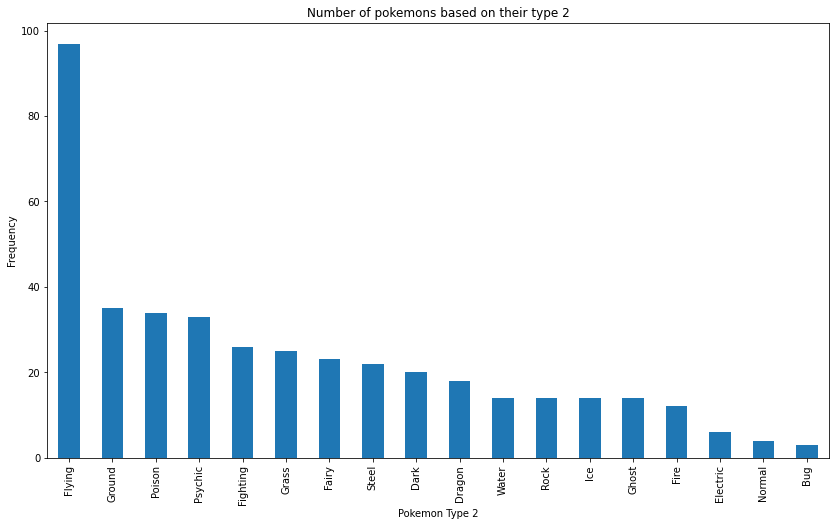

In [7]:
# Plot the number of pokemon present in each category of "type 1"
ax = pokemon['Type 2'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 2")
ax.set_xlabel("Pokemon Type 2")
ax.set_ylabel("Frequency")

### Data Processing
check dtpyes for any stange type within the columns

In [8]:




print(pokemon.dtypes)

# Not every pokemon has a type 2
print(pokemon.loc[pokemon["Type 2"].str.contains('[^a-zA-Z]') != False].head())

# Some Pokemon Type 2 do not have a value assigned
pokemon["Type 2"] = pokemon["Type 2"].fillna("NA")


# Check if it was solved
print(pokemon.loc[pokemon["Type 2"].str.contains('[^a-zA-Z]') != False].head())

pokemon.dtypes

# Convert Legendary boolean column to int
pokemon["Legendary"]=pokemon["Legendary"].astype(int)
pokemon.head()

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object
     #        Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
4    5  Charmander   Fire    NaN  39      52       43       60       50   
5    6  Charmeleon   Fire    NaN  58      64       58       80       65   
9   10    Squirtle  Water    NaN  44      48       65       50       64   
10  11   Wartortle  Water    NaN  59      63       80       65       80   
11  12   Blastoise  Water    NaN  79      83      100       85      105   

    Speed  Generation  Legendary  
4      65           1      False  
5      80           1      False  
9      43           1      False  
10     58           1      False  
11     78           1      False  
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, HP, Attack, Defense, S

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,5,Charmander,Fire,NA,39,52,43,60,50,65,1,0


In [9]:
# Use the Feature hashing to hash pokemon types to numeric values https://en.wikipedia.org/wiki/Feature_hashing

from sklearn.feature_extraction import FeatureHasher

h1 = FeatureHasher(n_features=5, input_type='string')
h2 = FeatureHasher(n_features=5, input_type='string')
d1 = h1.fit_transform(pokemon["Type 1"])
d2 = h2.fit_transform(pokemon["Type 2"])
# Convert to dataframe
d1 = pd.DataFrame(data=d1.toarray())
d2 = pd.DataFrame(data=d2.toarray())
# Drop Type 1 and Type 2 column from Pokemon dataset and concatenate the above two dataframes.
pokemon = pokemon.drop(columns = ["Type 1", "Type 2"])
pokemon = pd.concat([pokemon, d1, d2], axis=1)
pokemon

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,0,1,2,3,4,0,1,2,3,4
0,1,Bulbasaur,45,49,49,65,65,45,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
1,2,Ivysaur,60,62,63,80,80,60,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
2,3,Venusaur,80,82,83,100,100,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
3,4,Mega Venusaur,80,100,123,122,120,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
4,5,Charmander,39,52,43,60,50,65,1,0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
796,797,Mega Diancie,50,160,110,160,110,110,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
797,798,Hoopa Confined,80,110,60,150,130,70,6,1,-1.0,-2.0,-2.0,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,1,-1.0,-2.0,-2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [10]:
data = []
i = 0
# for each tuple of combats.csv
for t in combats.itertuples():
    i += 1
    first_pokemon = t[1] # get the first pokemon
    second_pokemon = t[2] # get the second pokemon
    winner = t[3]         # get the winner
    
    x = pokemon.loc[pokemon["#"]==first_pokemon].values[:, 2:][0] # get info about first pokemon
    y = pokemon.loc[pokemon["#"]==second_pokemon].values[:, 2:][0] # get info about second pokemon
    diff = (x-y)[:6] # difference between "base stats hp...."
    z = np.concatenate((x,y)) 
    if winner == first_pokemon:
        z = np.append(z, [0])
    else:
        z = np.append(z, [1])
        
    data.append(z)
    
data = np.asarray(data)
X = data[:, :-1].astype(int)
y = data[:, -1].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(X_train,y_train)
pred = model.predict(X_test)
# print('Accuracy of {}:'.format(name), accuracy_score(pred, y_test))
print('Accuracy :', accuracy_score(pred, y_test))
print(classification_report(y_test, pred))

Accuracy : 0.94728
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5941
           1       0.95      0.95      0.95      6559

    accuracy                           0.95     12500
   macro avg       0.95      0.95      0.95     12500
weighted avg       0.95      0.95      0.95     12500

